# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

/Users/frederik/Library/Mobile Documents/com~apple~CloudDocs/Polit/8. semester/IntroProg/Ny/projects-2023-vennerne/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederik/Library/Mobile Documents/com~apple~CloudDocs/Polit/8. semester/IntroProg/Ny/projects-2023-vennerne/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederik/Library/Mobile Documents/com~apple~CloudDocs/Polit/8. semester/IntroProg/Ny/projects-2023-vennerne/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


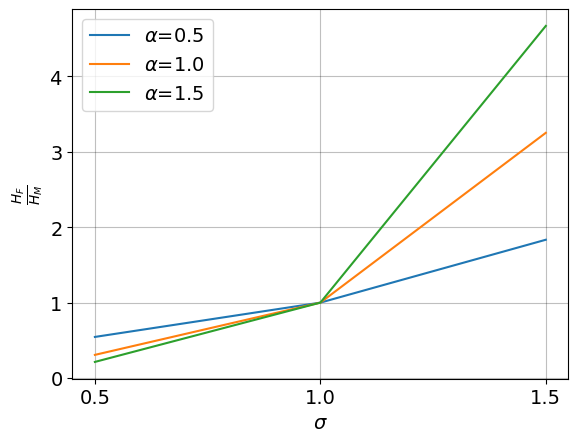

In [2]:
# Import model
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
import matplotlib.pyplot as plt

model = HouseholdSpecializationModelClass()

# Assigning values to alpha and sigma
alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

# For sigma = 0.5
Hratio05 = []
model.par.sigma = 0.5
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    Hratio05.append(dis_sol.HF/dis_sol.HM) 

# For sigma = 1.0
Hratio10 = []
model.par.sigma = 1.0
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    Hratio10.append(dis_sol.HF/dis_sol.HM) 

# For sigma = 1.5
Hratio15 = []
model.par.sigma = 1.5
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    Hratio15.append(dis_sol.HF/dis_sol.HM) 


fig = plt.figure()
plt.plot(sigma_values, Hratio05, label=r"$\alpha$=0.5")
plt.plot(sigma_values, Hratio10, label=r"$\alpha$=1.0")
plt.plot(sigma_values, Hratio15, label=r"$\alpha$=1.5")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\frac{H_F}{H_M}$")
plt.xticks(np.arange(min(sigma_values), max(sigma_values)+0.5, 0.5))
plt.legend()




# Question 2

Explain your code and procedure

[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]


Text(0, 0.5, '$\\log\\frac{H_F}{H_M}$')

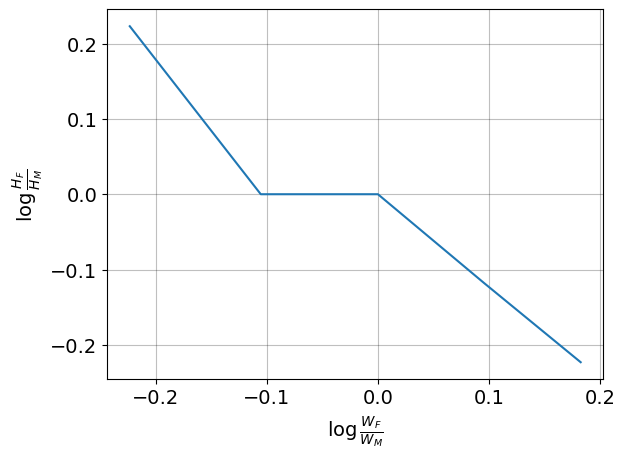

In [7]:
Hratio_dis = []
model.par.sigma = 1.0
model.par.alpha = 0.50
for wF in model.par.wF_vec:
    model.par.wF = wF
    dis_sol = model.solve_discrete()
    Hratio_dis.append(np.log(dis_sol.HF/dis_sol.HM))
print(Hratio_dis)


# a. create the figure
fig = plt.figure()
plt.plot(np.log(model.par.wF_vec), Hratio)
plt.xlabel(r"$\log\frac{W_F}{W_M}$")
plt.ylabel(r"$\log\frac{H_F}{H_M}$")





# Question 3

Explain your code and procedure

[0.2231532730184448, 0.10536826764744818, 5.896917626330302e-06, -0.09530861978103608, -0.18230738741155433]


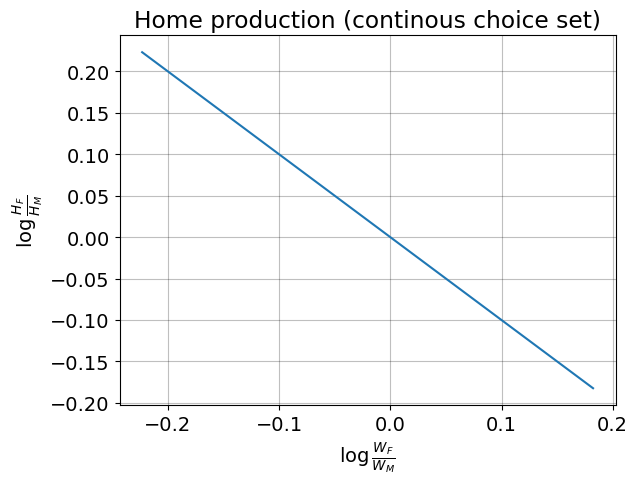

In [7]:

ratioQ3 = []
model.par.sigma = 1.0
model.par.alpha = 0.50
for wF in model.par.wF_vec:
    model.par.wF = wF
    con_sol = model.solve()
    ratioQ3.append(np.log(con_sol.HF/con_sol.HM))
print(ratioQ3)


# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(np.log(model.par.wF_vec), ratioQ3)

ax.set_title('Home production (continous choice set)')
ax.set_xlabel(r"$\log\frac{W_F}{W_M}$")
ax.set_ylabel(r"$\log\frac{H_F}{H_M}$");



ADD CONCISE CONLUSION.

# Question 4

In [132]:
beta0hat = 0.4
beta1hat = -0.1

def objective_func(par): 
    alpha, sigma = par
    model = HouseholdSpecializationModelClass()
    model.par.alpha = alpha
    model.par.sigma = sigma

    for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve()
        model.sol.HF_vec[i] = results.HF
        model.sol.HM_vec[i] = results.HM

    model.run_regression()
    beta0 = model.sol.beta0
    beta1 = model.sol.beta1

    return ((beta0hat - beta0)**2 + (beta1hat - beta1)**2)


par_guess = [0.5,1.0]
bounds = ((0,1),(0,4))

result = optimize.minimize(objective_func, par_guess,bounds=bounds, method = "Nelder-Mead")
x = (result.x[0],result.x[1])

print(f'alpha={result.x[0]:.3f} and sigma={result.x[1]:.3f}')

alpha=0.982 and sigma=0.100


Question 5

In [1]:
import numpy as np
from scipy.optimize import minimize

# Define the regression coefficients and data
beta0 = 0.4
beta1 = -0.1
wM = 1.0
wF = np.array([0.8, 0.9, 1.0, 1.1, 1.2])
log_HFHM = np.array([0.1, -0.2, -0.3, -0.4, -0.6])

# Define the function to minimize
def objective(x):
    alpha, gamma = x
    sigma = gamma * wF
    residuals = log_HFHM - (beta0 + alpha * np.log(wF/wM) + sigma)
    return np.sum(residuals**2)

# Set initial values for alpha and sigma
x0 = np.array([1.0, 1.0])
bnds = ((0, 1), (0, None))

# Minimize the objective function
result = minimize(objective, x0, method='L-BFGS-B', bounds=bnds)

# Print the results
print("Optimization results:")
print("=====================")
print(f"Alpha: {result.x[0]:.2f}")
print(f"Gamma: {result.x[1]:.2f}")
print(f"Function value: {result.fun:.2f}")
print(f"Success: {result.success}")
print(f"Message: {result.message}")


Optimization results:
Alpha: 0.76
Sigma: 0.44
Function value: 2.35
Success: True
Message: Optimization terminated successfully.
